In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scipy.stats as stats
import seaborn as sns
sns.set_style('whitegrid')  #style list >  'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold

In [81]:
df = pd.read_csv(r"C:\Users\ASUS\Dataset atau Handson\project 4\train.csv")
pd.set_option('display.max_columns', 100)

In [82]:
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1


Data Preprocessing

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [88]:
df = df.drop(columns=['id'])

In [90]:
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1


In [92]:
class DataPreprocessor:
    
    def __init__(self, df, target_col):
        self.df = df
        if target_col not in self.df.columns:
            raise ValueError(f"Target column '{target_col}' not found in DataFrame.")
        self.y = self.df[target_col]  # Initialize target variable from the copied DataFrame

    def normalize_data(self):
        """Strips whitespace and lowercases string columns."""
        self.df = self.df.apply(lambda col: col.str.strip().str.lower() if col.dtypes == 'object' else col)

    def check_missing(self):
        """Returns percentage of missing values per column."""
        missing_percent = self.df.isnull().mean() * 100
        return missing_percent

    def check_duplicate(self):
        """Prints and removes exact duplicate rows (before drop)."""
        duplicates = self.df[self.df.duplicated(keep=False)]

        if not duplicates.empty:
            print(f"Found {len(duplicates)} duplicate rows (exact duplicates):")
            print(duplicates)
        else:
            print("No exact duplicates found.")
            
    def drop_duplicates(self):
        """Drops exact duplicate rows and realigns the target variable."""
        original_len = len(self.df)
        self.df = self.df.drop_duplicates(keep='first')
        new_len = len(self.df)
        print(f"Dropped {original_len - new_len} duplicate rows.")
        self.y = self.df[self.y.name]  # Realign target variable
        return self.df

    def check_imbalanced(self):
        """Prints and returns class distribution in the target column."""
        counts = self.y.value_counts()
        percentages = self.y.value_counts(normalize=True) * 100
        print("\nTarget percentages:\n", percentages)
        return counts

    def remove_outliers_iqr(self):
        """Removes rows with outliers using IQR method. Returns a new DataFrame without altering self.df."""
        df_clean = self.df.copy()
        numeric_cols = df_clean.select_dtypes(include=['number']).columns
    
        for col in numeric_cols:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
        return df_clean


    def cap_outliers_iqr(self):
        """Caps outliers in numeric columns using IQR method. Returns a new DataFrame."""
        df_capped = self.df.copy()
        numeric_cols = df_capped.select_dtypes(include=['number']).columns
    
        for col in numeric_cols:
            Q1 = df_capped[col].quantile(0.25)
            Q3 = df_capped[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
    
        return df_capped

In [96]:
preprocessor = DataPreprocessor(df, target_col='smoking')
preprocessor.normalize_data()

In [98]:
df = preprocessor.drop_duplicates()

Dropped 0 duplicate rows.


In [100]:
print(preprocessor.check_missing())

age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
dental caries          0.0
smoking                0.0
dtype: float64


In [102]:
df_No_outlier = preprocessor.remove_outliers_iqr()

In [103]:
df_cap_outlier = preprocessor.cap_outliers_iqr()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

In [106]:
# Calculate correlation matrix for only numeric columns
corrmat = df.select_dtypes(include=['float64', 'int64', 'int32']).corr()

# Extract correlations with SalePrice, sort them, and drop SalePrice itself
smoking_corr = corrmat['smoking'].sort_values(ascending=False).drop('smoking')

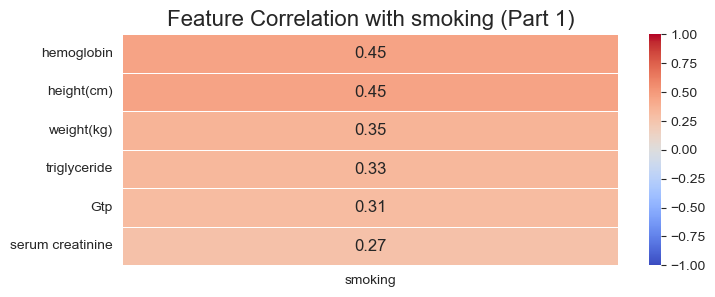

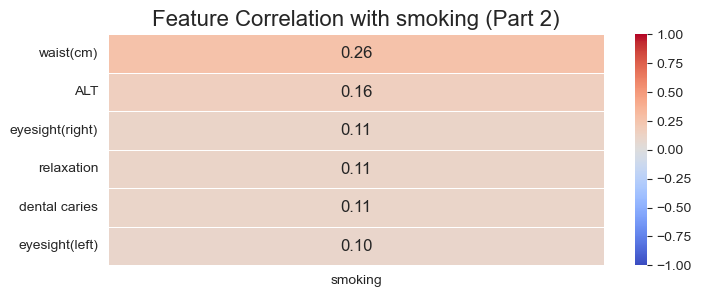

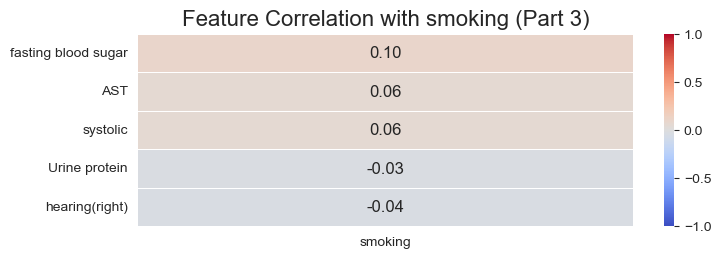

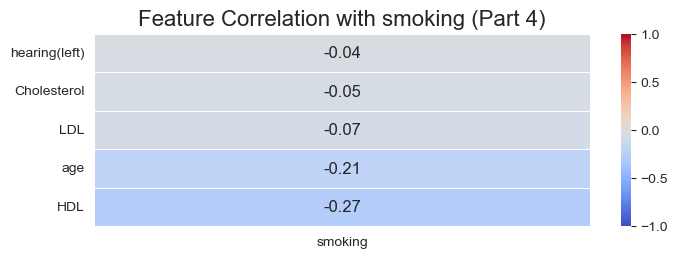

In [107]:
import numpy as np

# Split into 4 parts (20 features each)
num_splits = 4
feature_chunks = np.array_split(smoking_corr.index, num_splits)

for i, chunk in enumerate(feature_chunks):
    plt.figure(figsize=(8, len(chunk) * 0.5))  # Adjust height dynamically
    sns.heatmap(smoking_corr[chunk].to_frame(), annot=True, fmt=".2f", cmap="coolwarm",
                vmin=-1, vmax=1, annot_kws={"size": 12}, linewidths=0.5)
    plt.title(f"Feature Correlation with smoking (Part {i+1})", fontsize=16)
    plt.show()

## Feature Enginering

In [110]:
bins = [20, 65, 85]  
labels = ["Adult", "Elder"]

df["Age Group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

In [112]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Encode the 'Age Group' column and create a new column with the encoded values
df["Age Group Encoded"] = le.fit_transform(df["Age Group"])

# Optionally drop the original 'Age Group' column
df.drop(['Age Group'], axis=1, inplace=True)

In [114]:
df["combined_hearing"] = (df["hearing(left)"] + df["hearing(right)"]) / 2

In [116]:
df["combined_vision"] = (df["eyesight(left)"] + df["eyesight(right)"]) / 2

In [124]:
dummies = pd.get_dummies(
    df["dental caries"],      # column to encode
    prefix="caries",
    dtype=int                 # <‑‑ make the new columns integers 0/1
)
df = pd.concat([df, dummies], axis=1)

In [126]:
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,Age Group Encoded,combined_hearing,combined_vision,caries_0,caries_1
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1,0,1.0,0.55,1,0
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0,1,2.0,0.65,0,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1,0,1.0,0.45,1,0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0,0,1.0,1.35,0,1
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1,0,1.0,1.25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,0,0,1.0,1.75,1,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0,0,1.0,1.00,1,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0,0,1.0,1.25,1,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1,0,1.0,1.10,1,0


In [128]:
# Calculate correlation matrix for only numeric columns
corrmat = df.select_dtypes(include=['float64', 'int64', 'int32']).corr()

# Extract correlations with SalePrice, sort them, and drop SalePrice itself
smoking_corr = corrmat['smoking'].sort_values(ascending=False).drop('smoking')

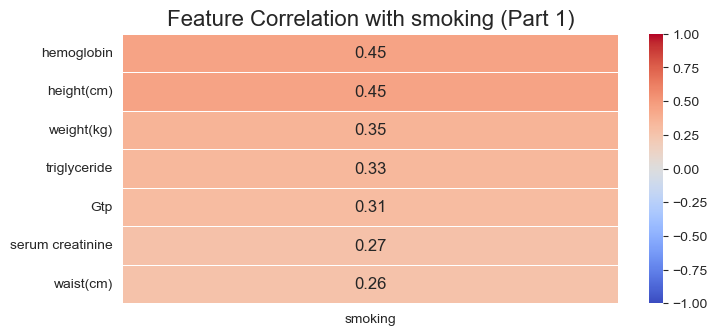

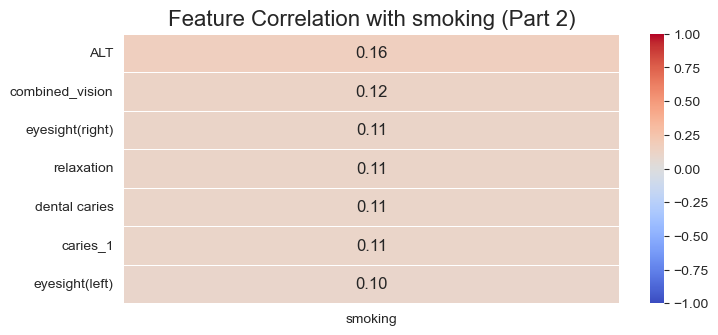

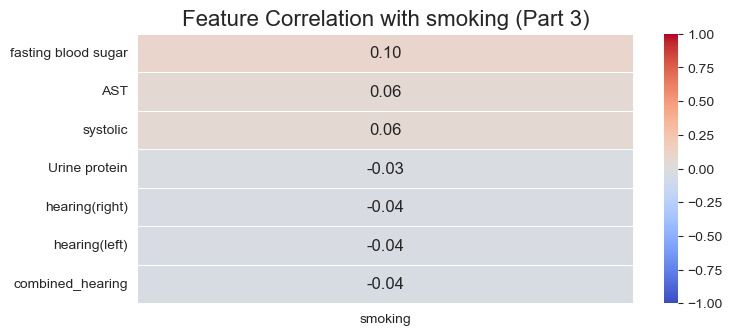

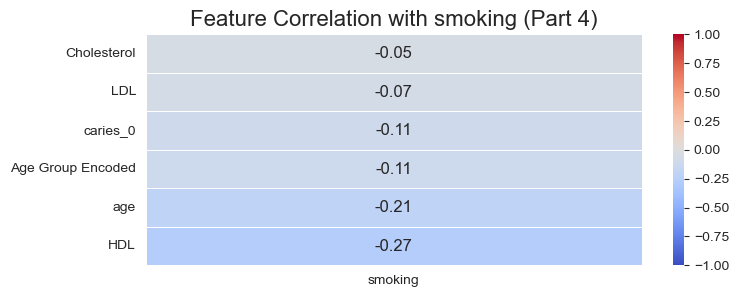

In [129]:
import numpy as np

# Split into 4 parts (20 features each)
num_splits = 4
feature_chunks = np.array_split(smoking_corr.index, num_splits)

for i, chunk in enumerate(feature_chunks):
    plt.figure(figsize=(8, len(chunk) * 0.5))  # Adjust height dynamically
    sns.heatmap(smoking_corr[chunk].to_frame(), annot=True, fmt=".2f", cmap="coolwarm",
                vmin=-1, vmax=1, annot_kws={"size": 12}, linewidths=0.5)
    plt.title(f"Feature Correlation with smoking (Part {i+1})", fontsize=16)
    plt.show()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

In [132]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'combined_hearing',
       'combined_vision'],
      dtype='object')


# Modeling

## XGBoost

In [292]:
# Step 1: Define Features and Target
X = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'combined_hearing', 'combined_vision' , 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries',
       ]]

y = df['smoking']

In [294]:
from sklearn.model_selection import train_test_split
# Split into train, validation, and test sets (80% train, 10% val, 10% test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (127404, 20), Validation shape: (15926, 20), Test shape: (15926, 20)


In [296]:
num_classes = len(np.unique(Y_train))
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV

# Define initial parameters
params = {
    'objective': 'binary:logistic',  
    'eval_metric': 'roc',  
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'learning_rate': 0.001,
    'n_estimators': 500,
    'random_state': 42,
    'reg_alpha': 0.1,
    'reg_lambda': 0.5,
    'num_class': num_classes
}

# Initialize the XGBoost Classifier
xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='logloss',
    use_label_encoder=False,random_state=42)
    
# Define hyperparameter search space
param_space = {
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'subsample': (0.5, 1.0, 'uniform'),
    'colsample_bytree': (0.5, 1.0, 'uniform'),
    'learning_rate': (1e-3, 0.3, 'log-uniform'),
    'reg_alpha': (0.0, 1.0, 'uniform'),
    'reg_lambda': (0.0, 1.0, 'uniform'),
    'n_estimators': (100, 1000)
}

# Set up Bayesian Optimization
bayes_search = BayesSearchCV(
    xgb_clf,
    param_space,
    n_iter=50,
    cv=5,
    scoring='roc_auc',  # or 'f1_macro' for imbalanced classes
    n_jobs=-1,
    random_state=42
)

# Fit model using resampled training data
bayes_search.fit(X_train, Y_train)

# Print the best hyperparameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: OrderedDict({'colsample_bytree': 0.5, 'learning_rate': 0.031233309296671567, 'max_depth': 8, 'min_child_weight': 10, 'n_estimators': 1000, 'reg_alpha': 0.0, 'reg_lambda': 0.8976562327016346, 'subsample': 1.0})


In [297]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=Y_train)
dval = xgb.DMatrix(X_val, label=Y_val)

# Set parameters for classification
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',  # Common for classification
    # Alternative metrics: 'error', 'merror', 'mlogloss', 'auc'
    'random_state': 42,
    **best_params
}

# Remove 'n_estimators' if it exists in best_params
params.pop("n_estimators", None)

# Define validation sets
evals = [(dtrain, 'train'), (dval, 'eval')]

# Use num_boost_round instead of n_estimators
num_boost_round = best_params.get("n_estimators", 500)  # Default to 500 if missing

# Train with early stopping
optimized_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=50,  # Stop if no improvement in 50 rounds
    verbose_eval=10
)

# Get the best iteration safely
best_iteration = getattr(optimized_xgb, "best_iteration", num_boost_round)
print(f"Best Iteration: {best_iteration}")

# Make predictions
dtest = xgb.DMatrix(X_test)
Y_pred_proba = optimized_xgb.predict(dtest, iteration_range=(0, best_iteration))

# For binary classification, convert probabilities to class predictions
Y_pred = (Y_pred_proba > 0.5).astype(int)

# Evaluate performance
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nAccuracy:", accuracy_score(Y_test, Y_pred))

[0]	train-logloss:0.67420	eval-logloss:0.67617
[10]	train-logloss:0.59852	eval-logloss:0.60317
[20]	train-logloss:0.55087	eval-logloss:0.55755
[30]	train-logloss:0.51805	eval-logloss:0.52684
[40]	train-logloss:0.49524	eval-logloss:0.50590
[50]	train-logloss:0.47868	eval-logloss:0.49104
[60]	train-logloss:0.46594	eval-logloss:0.47992
[70]	train-logloss:0.45636	eval-logloss:0.47211
[80]	train-logloss:0.44927	eval-logloss:0.46663
[90]	train-logloss:0.44344	eval-logloss:0.46232
[100]	train-logloss:0.43850	eval-logloss:0.45898
[110]	train-logloss:0.43418	eval-logloss:0.45611
[120]	train-logloss:0.43078	eval-logloss:0.45412
[130]	train-logloss:0.42769	eval-logloss:0.45260
[140]	train-logloss:0.42476	eval-logloss:0.45113
[150]	train-logloss:0.42216	eval-logloss:0.44988
[160]	train-logloss:0.41987	eval-logloss:0.44878
[170]	train-logloss:0.41782	eval-logloss:0.44806
[180]	train-logloss:0.41573	eval-logloss:0.44720
[190]	train-logloss:0.41382	eval-logloss:0.44665
[200]	train-logloss:0.41233	eva


Top 10 Features by Gain Importance:
                  weight        gain        cover
height(cm)        2584.0  147.320404  2914.122070
hemoglobin        6262.0   36.263390  1691.791382
Gtp               7216.0   23.738554  1789.340576
serum creatinine  3187.0   17.338503  1591.127563
dental caries      778.0   14.136753  2356.932373
triglyceride      8538.0   13.196735  1759.981079
age               4183.0   12.809162  1761.485596
weight(kg)        3239.0   11.348172  1826.063965
LDL               7397.0    7.049878  1551.517822
ALT               6656.0    6.366709  1746.382812


<Figure size 1000x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

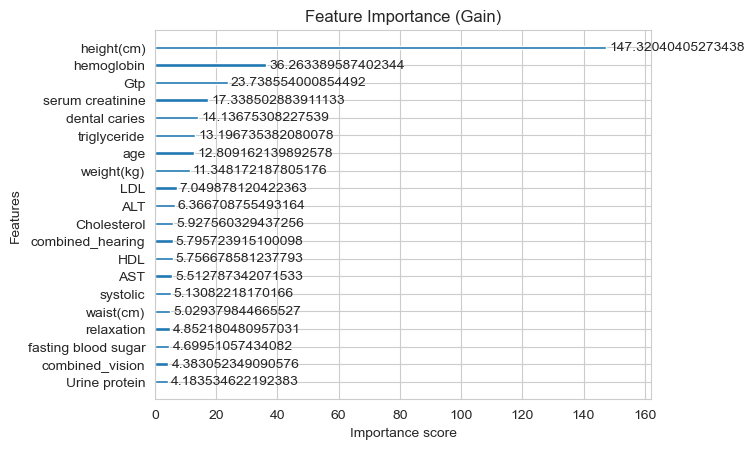

In [298]:
## 1. Feature Importance ##
plt.figure(figsize=(10, 8))

# Get all importance types
importance_data = {}
for importance_type in ['weight', 'gain', 'cover']:
    scores = optimized_xgb.get_score(importance_type=importance_type)
    importance_data[importance_type] = scores

# Create DataFrame in a safe way
features = optimized_xgb.feature_names if hasattr(optimized_xgb, 'feature_names') else [f'f{i}' for i in range(len(importance_data['gain']))]

importance_df = pd.DataFrame(index=features)

for imp_type, scores in importance_data.items():
    # Convert dictionary to series with feature names as index
    imp_series = pd.Series(scores)
    importance_df[imp_type] = imp_series

# Fill NaN with 0 for features not used in a particular importance type
importance_df = importance_df.fillna(0).sort_values('gain', ascending=False)

print("\nTop 10 Features by Gain Importance:")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
xgb.plot_importance(optimized_xgb, importance_type='gain', max_num_features=20)
plt.title('Feature Importance (Gain)')
plt.show()

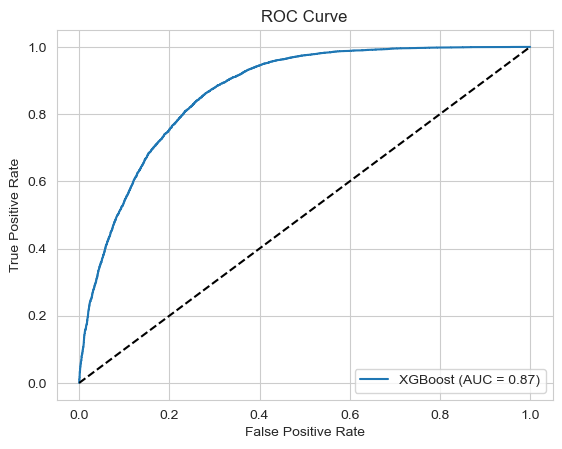

In [299]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
auc_score = roc_auc_score(Y_test, Y_pred_proba)

# Plot
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

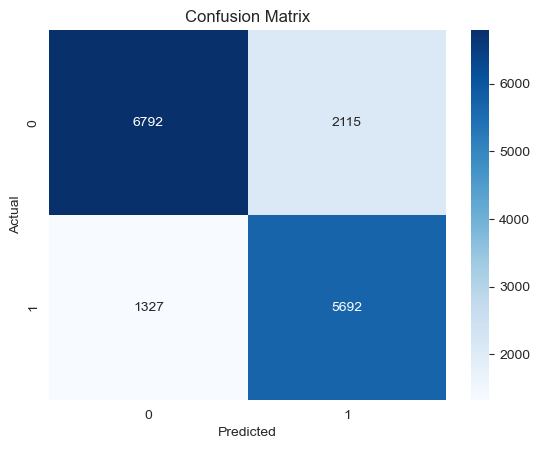

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## CATBoost

In [210]:
# Step 1: Define Features and Target
X = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'combined_hearing', 'combined_vision' , 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries',
       ]]

y = df['smoking']

In [212]:
# Split into train, validation, and test sets (80% train, 10% val, 10% test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (127404, 20), Validation shape: (15926, 20), Test shape: (15926, 20)


In [214]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Identify categorical columns
cat_features = X.select_dtypes(include='object').columns.tolist()

# Convert to CatBoost Pool
train_pool = Pool(X_train, Y_train, cat_features=cat_features)
val_pool = Pool(X_val, Y_val, cat_features=cat_features)

# Define Bayesian Optimization function
def catboost_cv(iterations, depth, learning_rate, l2_leaf_reg, bagging_temperature, random_strength):
    params = {
        'iterations': int(iterations),
        'depth': int(depth),
        'learning_rate': learning_rate,
        'l2_leaf_reg': l2_leaf_reg,
        'bagging_temperature': bagging_temperature,
        'random_strength': random_strength,
        'eval_metric': 'AUC',
        'random_seed': 42,
        'logging_level': 'Silent',
        'cat_features': cat_features
    }

    model = CatBoostClassifier(**params)
    scores = cross_val_score(model, X_train, Y_train, cv=3, scoring='roc_auc')
    return scores.mean()

# Set parameter bounds
pbounds = {
    'iterations': (300, 1000),
    'depth': (5, 12),
    'learning_rate': (0.001, 0.05),
    'l2_leaf_reg': (1, 10),
    'bagging_temperature': (0, 1),
    'random_strength': (1, 20)
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(
    f=catboost_cv,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)

# Retrieve best parameters
best_params = optimizer.max['params']
best_params['iterations'] = int(best_params['iterations'])
best_params['depth'] = int(best_params['depth'])

print("Best Parameters:", best_params)

# Train final model
final_model = CatBoostClassifier(
    **best_params,
    eval_metric='AUC',
    random_seed=42,
    cat_features=cat_features,
    verbose=100
)

final_model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=30)

# Predict and evaluate
y_pred = final_model.predict(X_val)
y_pred_proba = final_model.predict_proba(X_val)[:, 1]

print("Validation Accuracy:", accuracy_score(Y_val, y_pred))
print("Validation ROC AUC:", roc_auc_score(Y_val, y_pred_proba))

|   iter    |  target   | baggin... |   depth   | iterat... | l2_lea... | learni... | random... |
-------------------------------------------------------------------------------------------------
| 1         | 0.8609    | 0.3745    | 11.66     | 812.4     | 6.388     | 0.008645  | 3.964     |
| 2         | 0.841     | 0.05808   | 11.06     | 720.8     | 7.373     | 0.002009  | 19.43     |
| 3         | 0.8508    | 0.8324    | 6.486     | 427.3     | 2.651     | 0.01591   | 10.97     |
| 4         | 0.8578    | 0.4319    | 7.039     | 728.3     | 2.255     | 0.01532   | 7.961     |
| 5         | 0.8642    | 0.4561    | 10.5      | 439.8     | 5.628     | 0.03003   | 1.883     |
| 6         | 0.8631    | 0.7535    | 11.0      | 713.1     | 4.297     | 0.02261   | 15.94     |
| 7         | 0.8654    | 0.1242    | 9.989     | 818.5     | 2.408     | 0.03206   | 17.81     |
| 8         | 0.8614    | 0.2104    | 11.95     | 449.7     | 7.309     | 0.02529   | 6.466     |
| 9         | 0.8641

0:	total: 33.8ms	remaining: 27.6s
100:	total: 3.22s	remaining: 22.9s
200:	total: 5.93s	remaining: 18.2s
300:	total: 9.02s	remaining: 15.5s
400:	total: 12.1s	remaining: 12.6s
500:	total: 15.5s	remaining: 9.79s
600:	total: 18.9s	remaining: 6.81s
700:	total: 22.1s	remaining: 3.68s
800:	total: 26s	remaining: 551ms
817:	total: 26.6s	remaining: 0us


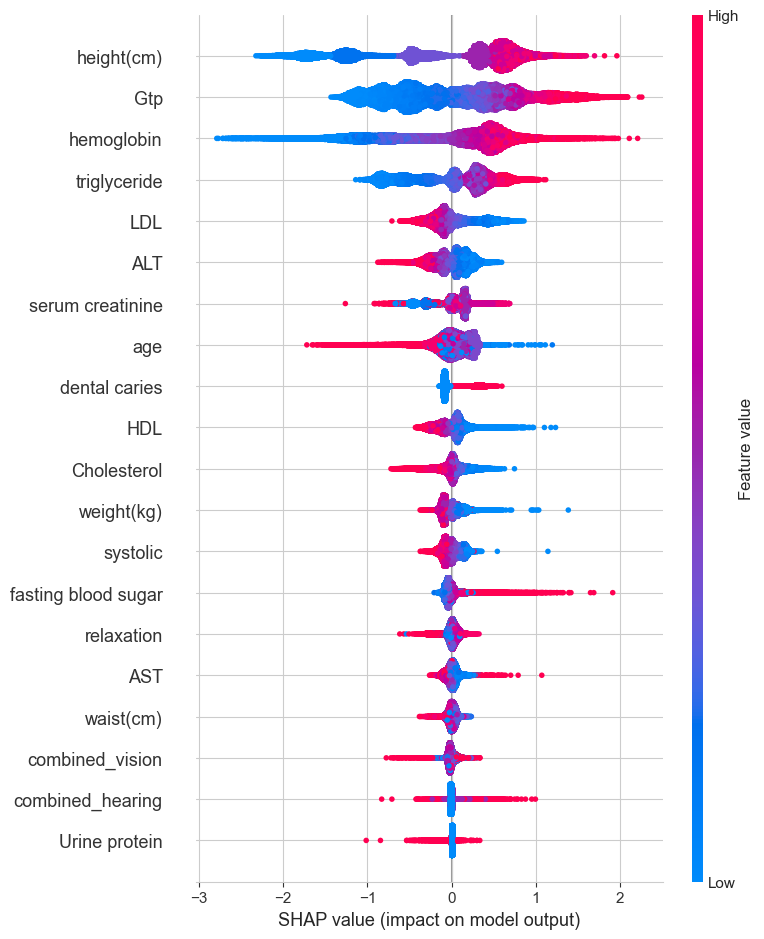

In [280]:
import shap
final_model.fit(X_train, Y_train, cat_features=cat_features)

# Create a SHAP explainer
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_train)

# Plot summary
shap.summary_plot(shap_values, X_train)

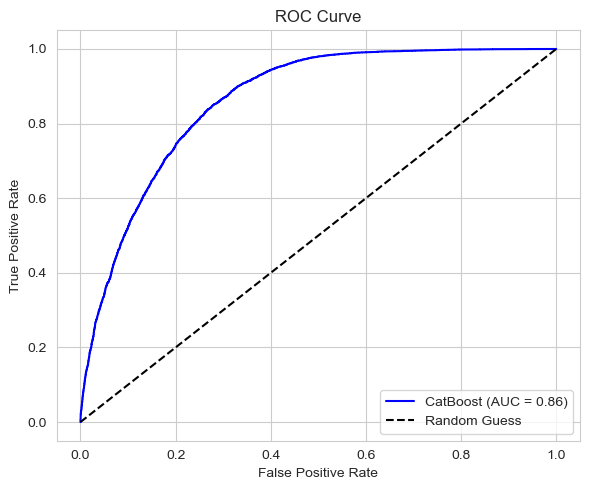

In [215]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Use predicted probabilities for the positive class
y_proba = final_model.predict_proba(X_val)[:, 1]  # Probabilities of class 1

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_val, y_proba)
auc_score = roc_auc_score(Y_val, y_proba)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='CatBoost (AUC = {:.2f})'.format(auc_score), color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

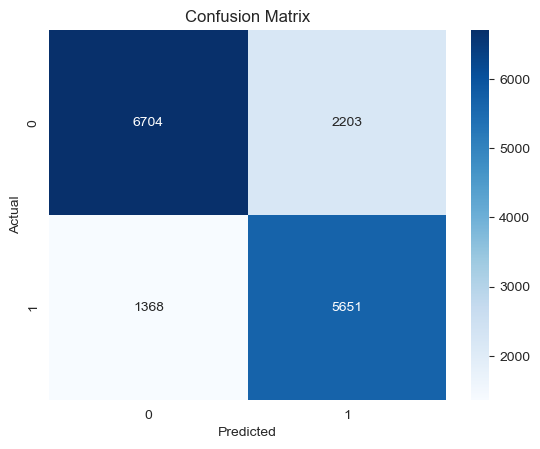

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save model and make API

In [306]:
#XGBOOST
from joblib import dump

# Save your trained XGBoost model
dump(optimized_xgb, 'project4_XGBOOST_86.joblib')

['project4_XGBOOST_86.joblib']

In [284]:
#CATBOOST
from joblib import dump

# Save your trained CATBoost model
dump(final_model, 'project4_CatBoost_86.joblib')

['project4_CatBoost_86.joblib']

In [286]:
import joblib
model = joblib.load("project4_CatBoost_86.joblib")
print(model.feature_names_)          # CatBoost

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'combined_hearing', 'combined_vision', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']


In [290]:
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
from joblib import load

app = FastAPI(title="CatBoost Health‑Risk API")

# ── 1. Load trained model ───────────────────────────────────────────────────────
model = load("project4_CatBoost_86.joblib")          # already trained – no retrain

# ── 2. Input schema with Python‑safe identifiers ────────────────────────────────
class InputData(BaseModel):
    hdl:                     float
    ldl:                     float
    relaxation:              float
    fasting_blood_sugar:     float
    ast:                     float
    alt:                     float
    gtp:                     float
    serum_creatinine:        float
    hemoglobin:              float
    urine_protein:           float
    waist_cm:                float
    combined_hearing:        float
    combined_vision:         float
    systolic:                float
    cholesterol:             float
    triglyceride:            float
    dental_caries:           float
    age:                     int
    height_cm:               float
    weight_kg:               float

# ── 3. Mapping dict: API field  ➜  model's original column name ────────────────
RENAME_TO_MODEL = {
    "hdl":                   "HDL",
    "ldl":                   "LDL",
    "relaxation":            "relaxation",
    "fasting_blood_sugar":   "fasting blood sugar",
    "ast":                   "AST",
    "alt":                   "ALT",
    "gtp":                   "Gtp",
    "serum_creatinine":      "serum creatinine",
    "hemoglobin":            "hemoglobin",
    "urine_protein":         "Urine protein",
    "waist_cm":              "waist(cm)",
    "combined_hearing":      "hearing_combined",      # ← adjust if different
    "combined_vision":       "vision_combined",       # ← adjust if different
    "systolic":              "systolic",
    "cholesterol":           "Cholesterol",
    "triglyceride":          "triglyceride",
    "dental_caries":         "dental caries",
    "age":                   "age",
    "height_cm":             "height(cm)",
    "weight_kg":             "weight(kg)"
}

# ── 4. Prediction endpoint ──────────────────────────────────────────────────────
@app.post("/predict")
def predict(data: InputData):
    # Convert pydantic → DataFrame
    df = pd.DataFrame([data.dict()])

    # Rename columns to match the model’s training schema
    df.rename(columns=RENAME_TO_MODEL, inplace=True)

    # Ensure column order equals model.feature_names_
    df = df[model.feature_names_]

    # Predict
    class_hat   = model.predict(df)
    proba_hat   = model.predict_proba(df)[:, 1]  # probability of positive class

    return {
        "prediction": int(class_hat[0]),
        "probability": float(proba_hat[0])
    }